# BHANDARKAR PRASAD PRASHANT

20122061

ML LAB (Naive Bayes Classifier) 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [32]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem 
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calculate_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        #values will get return in ndarray 

        return self.prior
    
    def calculate_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calculate_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [21]:
# LOAD winequality dataset -  shape is (1599,12)
df = pd.read_csv("winequality-red.csv")
# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# df shape
print(df.shape)
# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]


# # split on train and test 0.7/0.3
X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1599, 12)
(1000, 11) (1000,)
(599, 11) (599,)


In [46]:
#To get the information about the x 
x.classes, x.feature_nums, x.rows, x.count

(array([3, 4, 5, 6, 7, 8], dtype=int64), 11, 1000, 6)

In [43]:
#calculate prior probabilities
x.calc_prior(X_train, y_train)

array([0.004, 0.037, 0.426, 0.399, 0.122, 0.012])

In [44]:
#prior probabilities
x.prior

array([0.004, 0.037, 0.426, 0.399, 0.122, 0.012])

In [45]:
#calculate mean, variance for each column and convert to numpy array
x.calc_statistics(X_train, y_train)

(array([[ 8.5       ,  0.84875   ,  0.1825    ,  2.225     ,  0.1215    ,
         13.        , 34.        ,  0.99787   ,  3.34      ,  0.53      ,
          9.875     ],
        [ 7.88648649,  0.65243243,  0.20432432,  2.55675676,  0.09381081,
         12.94594595, 32.72972973,  0.99644514,  3.38189189,  0.59513514,
         10.36351351],
        [ 8.19647887,  0.57295775,  0.24640845,  2.50422535,  0.0950939 ,
         16.69483568, 55.75234742,  0.99713509,  3.29577465,  0.62410798,
          9.8443662 ],
        [ 8.3641604 ,  0.49418546,  0.27809524,  2.49686717,  0.08642105,
         15.97744361, 41.98245614,  0.99666025,  3.31157895,  0.68025063,
         10.60121136],
        [ 8.9295082 ,  0.41852459,  0.37532787,  2.77295082,  0.0784918 ,
         13.94672131, 34.5       ,  0.99617803,  3.28893443,  0.7352459 ,
         11.47008197],
        [ 8.39166667,  0.43416667,  0.36666667,  2.475     ,  0.06766667,
         15.66666667, 38.75      ,  0.9953075 ,  3.26833333,  0.7783333

In [47]:
x.mean

array([[ 8.5       ,  0.84875   ,  0.1825    ,  2.225     ,  0.1215    ,
        13.        , 34.        ,  0.99787   ,  3.34      ,  0.53      ,
         9.875     ],
       [ 7.88648649,  0.65243243,  0.20432432,  2.55675676,  0.09381081,
        12.94594595, 32.72972973,  0.99644514,  3.38189189,  0.59513514,
        10.36351351],
       [ 8.19647887,  0.57295775,  0.24640845,  2.50422535,  0.0950939 ,
        16.69483568, 55.75234742,  0.99713509,  3.29577465,  0.62410798,
         9.8443662 ],
       [ 8.3641604 ,  0.49418546,  0.27809524,  2.49686717,  0.08642105,
        15.97744361, 41.98245614,  0.99666025,  3.31157895,  0.68025063,
        10.60121136],
       [ 8.9295082 ,  0.41852459,  0.37532787,  2.77295082,  0.0784918 ,
        13.94672131, 34.5       ,  0.99617803,  3.28893443,  0.7352459 ,
        11.47008197],
       [ 8.39166667,  0.43416667,  0.36666667,  2.475     ,  0.06766667,
        15.66666667, 38.75      ,  0.9953075 ,  3.26833333,  0.77833333,
        12.   

In [48]:
x.var

array([[3.49500000e+00, 2.99796875e-02, 7.63187500e-02, 6.11875000e-01,
        7.12325000e-03, 2.90000000e+01, 2.37000000e+02, 5.08635000e-06,
        7.25000000e-03, 1.00000000e-03, 5.16875000e-01],
       [3.07792549e+00, 4.52967860e-02, 4.87596786e-02, 1.22623813e+00,
        7.81739664e-03, 9.42673484e+01, 5.01440467e+02, 1.97203579e-06,
        3.82585829e-02, 6.15871439e-02, 8.41439007e-01],
       [2.47893126e+00, 2.84882001e-02, 3.31159740e-02, 1.70640233e+00,
        3.87365316e-03, 1.13390443e+02, 1.31283362e+03, 2.30974893e-06,
        2.16793295e-02, 3.04298381e-02, 4.66552767e-01],
       [3.03678570e+00, 2.58614293e-02, 3.61166726e-02, 2.26513430e+00,
        1.76408337e-03, 1.08048363e+02, 6.45370620e+02, 4.03054630e-06,
        2.17070307e-02, 2.65909146e-02, 1.09370432e+00],
       [4.34716205e+00, 2.22810199e-02, 3.96724335e-02, 1.88213719e+00,
        1.15700403e-03, 9.82942925e+01, 9.74922131e+02, 5.20916662e-06,
        2.24914875e-02, 1.67200215e-02, 1.01461721e+

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
2,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
3,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
4,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6


In [35]:
# train the model
x = NaiveBayesClassifier()


x.fit(X_train, y_train)

In [36]:
predictions = x.predict(X_test)

In [37]:
x.accuracy(y_test, predictions)


0.5759599332220368

In [38]:
y_test.value_counts(normalize=True)

5    0.425710
6    0.398998
7    0.128548
4    0.026711
8    0.010017
3    0.010017
Name: quality, dtype: float64

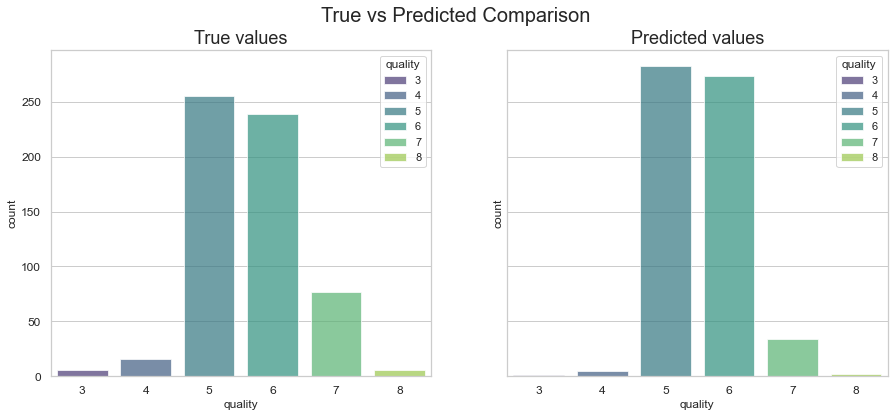

In [40]:

x.visualize(y_test, predictions, 'quality')